# ANOVA Hypothesis Testing: Comparing Group Means

This project uses **ANOVA** to test the null hypothesis (H0) that there’s no significant difference in means across groups in the dataset. I applied **hypothesis testing** and statistical analysis with Python (SciPy, Pandas) to determine group differences.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot

df=pd.read_excel("Braking.xlsx")

In [3]:
df.head(10)

,Braking_distance,road_condition,tyre_condition
0,38,dry,new
1,41,dry,new
2,43,dry,new
3,40,dry,new
4,54,dry,worn
5,57,dry,worn
6,53,dry,worn
7,58,dry,worn
8,72,wet,new
9,75,wet,new


In [2]:
df=df.rename(columns={"Braking distance": "Braking_distance", "road condition":"road_condition", "tyre condition":"tyre_condition"})

In [4]:
res=stat()
res.anova_stat(df=df, res_var='Braking distance', anova_model='Braking_distance~C(road_condition)+C(tyre_condition)+C(road_condition):C(tyre_condition)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(road_condition),1.0,15939.0625,15939.0625,2107.644628,7.445220e-15
C(tyre_condition),1.0,8977.5625,8977.5625,1187.115702,2.275642e-13
C(road_condition):C(tyre_condition),1.0,4192.5625,4192.5625,554.388430,2.059179e-11
Residual,12.0,90.7500,7.5625,NaN,NaN


In [7]:
model=ols('Braking_distance~C(road_condition)+C(tyre_condition)+C(road_condition):C(tyre_condition)', data=df).fit()

In [9]:
print(model.rsquared_adj)

0.9961151457944044


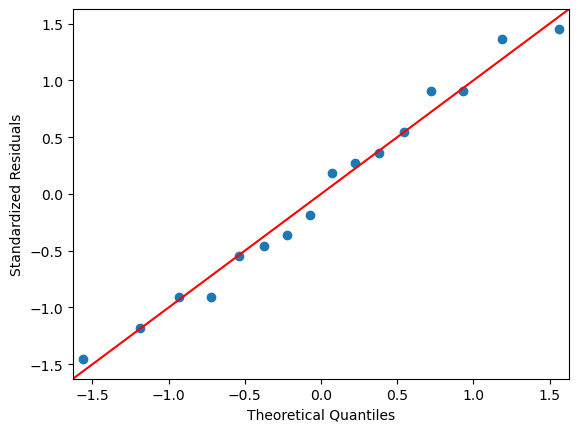

In [11]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel("Standardized Residuals")
plt.show()

In [12]:
test_results=stats.shapiro(model.resid)
print(test_results)

ShapiroResult(statistic=0.9658344984054565, pvalue=0.7674611806869507)


In [15]:
# equal variances test
res=stat()
res.levene(df=df, res_var='Braking_distance', xfac_var=['tyre_condition', 'road_condition'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.4217
1,Degrees of freedom (Df),3.0000
2,p value,0.7409


Text(0.5, 0, 'Observation Order')

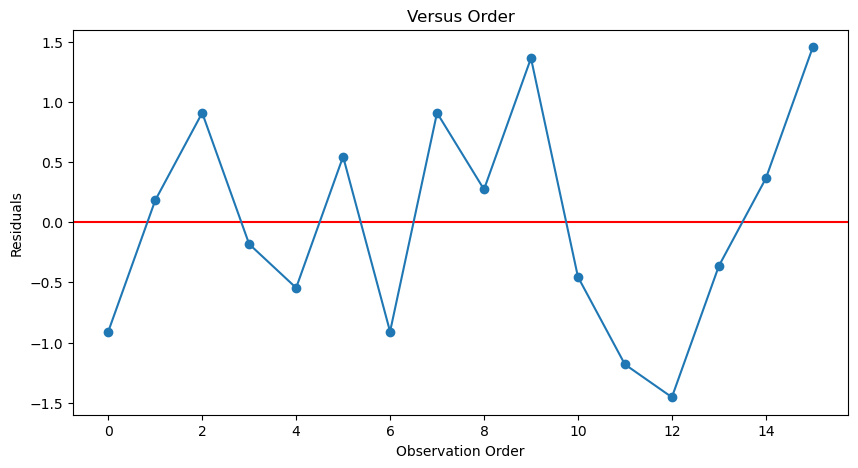

In [18]:
# Independence of residulas
res=stat()
res.anova_stat(df=df, res_var='Braking_distance', anova_model='Braking_distance~C(road_condition)+C(tyre_condition)+C(road_condition):C(tyre_condition)')
res.anova_summary
plt.rcParams['figure.figsize']=(10,5)
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(res.anova_std_residuals, "-o")
plt.title('Versus Order')
plt.ylabel('Residuals')
plt.xlabel('Observation Order')

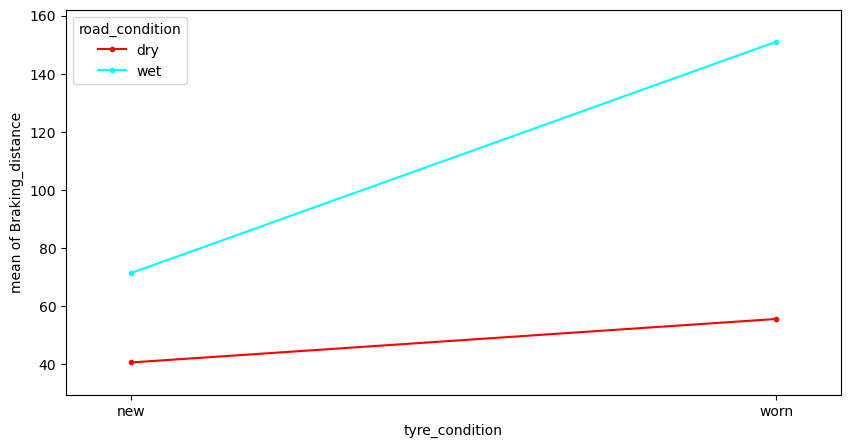

In [19]:
fig=interaction_plot(x=df['tyre_condition'], trace=df['road_condition'], response=df['Braking_distance'])
plt.show()

In [51]:
#Since all p-value are less than 0.05, we reject the H0, which is the interactions between factors has significant impact on the response variable
res=stat()
res.tukey_hsd(df=df, res_var='Braking_distance', xfac_var=['tyre_condition', 'road_condition'], anova_model='Braking_distance~C(road_condition)+C(tyre_condition)+C(road_condition):C(tyre_condition)')
res.tukey_summary


C:\Users\Hossein\anaconda3\lib\site-packages\bioinfokit\analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
C:\Users\Hossein\anaconda3\lib\site-packages\bioinfokit\analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
C:\Users\Hossein\anaconda3\lib\site-packages\bioinfokit\analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(new, dry)","(new, wet)",30.75,24.976163,36.523837,22.363636,0.001
1,"(new, dry)","(worn, dry)",15.00,9.226163,20.773837,10.909091,0.001
2,"(new, dry)","(worn, wet)",110.50,104.726163,116.273837,80.363636,0.001
3,"(new, wet)","(worn, dry)",15.75,9.976163,21.523837,11.454545,0.001
4,"(new, wet)","(worn, wet)",79.75,73.976163,85.523837,58.000000,0.001
5,"(worn, dry)","(worn, wet)",95.50,89.726163,101.273837,69.454545,0.001
